In [2]:
import numpy as np
import pandas as pd

In [5]:
cols = ['word_freq_make','word_freq_address', 'word_freq_all','word_freq_3d','word_freq_our','word_freq_over',
         'word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will',
         'word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email',
         'word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp',
         'word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857',
         'word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
         'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu',
         'word_freq_table','word_freq_conference','char_freq_; ','char_freq_( ','char_freq_[','char_freq_!','char_freq_$','char_freq_#',
        'capital_run_length_average','capital_run_length_longest','capital_run_length_total', 'spam']
df = pd.read_csv('spambase.data', names=cols)
df

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
features = df.loc[:,df.columns != 'spam']
target = df.loc[:, 'spam']
# Split into training/testing
# The following will split as 75% training 25% testing
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=3000)
scaler = StandardScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_test = pd.DataFrame(scaler.transform(x_test), columns=x_test.columns)
y_train

3941    0
2095    0
54      1
1852    0
3560    0
       ..
1876    0
949     1
1966    0
3841    0
1016    1
Name: spam, Length: 3450, dtype: int64

In [8]:
# format a number based on its magnitude
# If <= 100000, print using :.3f
# Else print using :.0e
def format_nbr(f):
    if abs(f) < 100000:
        return f'{f:.3f}'
    else:
        return f'{f:.4e}'

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import metrics

def run_model(x_train, x_test, y_train, y_test, model):
    model.fit(x_train, y_train)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    err_train = 1-acc_train
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    err_test = 1-acc_test

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)

    print(f'   training accuracy = {format_nbr(acc_train)}')
    print(f'   testing accuracy = {format_nbr(acc_test)}')
    print(f'   training error = {format_nbr(err_train)}')
    print(f'   testing error = {format_nbr(err_test)}')
    print(f'   train f1 = {format_nbr(f1_train)}')
    print(f'   test f1 = {format_nbr(f1_test)}')
    print(f'   train AUC = {format_nbr(train_auc)}')
    print(f'   test AUC = {format_nbr(test_auc)}')

In [27]:
#1a train test accuracy, f1, auc
model = DecisionTreeClassifier(criterion="entropy")
run_model(x_train, x_test, y_train, y_test, model)

   training accuracy = 0.999
   testing accuracy = 0.914
   ? accuracy = 0.914
   training error = 0.001
   testing error = 0.086
   train f1 = 0.999
   test f1 = 0.893
   train AUC = 1.000
   test AUC = 0.914


In [22]:
#1b add gini index
model = DecisionTreeClassifier(criterion="gini")
run_model(x_train, x_test, y_train, y_test, model)

   training accuracy = 0.999
   testing accuracy = 0.905
   training error = 0.001
   testing error = 0.095
   train f1 = 0.999
   test f1 = 0.881
   train AUC = 1.000
   test AUC = 0.904


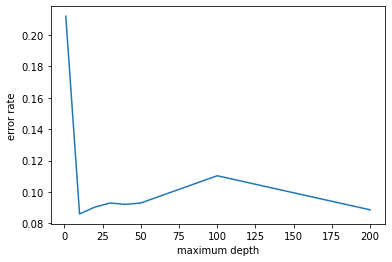

[0.21198957428323195,
 0.08601216333622941,
 0.09035621198957433,
 0.09296264118158126,
 0.09209383145091221,
 0.09296264118158126,
 0.11033883579496095,
 0.08861859252823634]

In [30]:
import matplotlib.pyplot as plt
#1c max depth

depth_col = []
train_errs = []
test_errs = []
for k in [1, 10, 20, 30, 40, 50, 100, 200]:
    result = DecisionTreeClassifier(max_depth = k)
    result.fit(x_train, y_train)
    y_train_predicted = result.predict(x_train)
    y_test_predicted = result.predict(x_test)
    acc_train = result.score(x_train, y_train)
    err_train = 1-acc_train
    acc_test = result.score(x_test, y_test)
    err_test = 1-acc_test
    depth_col.append(k)
    train_errs.append(err_train)
    test_errs.append(err_test)
    
plt.plot(depth_col, test_errs)
plt.xlabel('maximum depth')
plt.ylabel('error rate')
plt.show()
test_errs

In [24]:
from sklearn.ensemble import RandomForestClassifier
#2a random forest

estimators = []
acc_col_train = []
f1_col_train = []
auc_col_train = []
acc_col_test = []
f1_col_test = []
auc_col_test = []

for t in [10, 50, 100, 500]:
    model = RandomForestClassifier(n_estimators=t)
    model.fit(x_train, y_train)
    estimators.append(t)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    acc_col_train.append(acc_train)
    
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    acc_col_test.append(acc_test)

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)
    f1_col_train.append(f1_train)
    f1_col_test.append(f1_test)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_col_train.append(train_auc)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)
    auc_col_test.append(test_auc)
d = {'num trees': estimators, 'train accuracy': acc_col_train, 'test accuracy': acc_col_test, 
     'f1 train': f1_col_train, 'f1 test': f1_col_test, 'auc train': auc_col_train, 'auc test': auc_col_test}
pd.DataFrame(d)

,num trees,train accuracy,test accuracy,f1 train,f1 test,auc train,auc test
0,10,0.995362,0.940052,0.994109,0.921323,0.999958,0.981997
1,50,0.999420,0.954822,0.999267,0.941441,0.999999,0.987996
2,100,0.999420,0.960035,0.999266,0.948775,0.999999,0.988888
3,500,0.999420,0.958297,0.999266,0.946309,0.999999,0.989461


In [25]:
from sklearn.ensemble import AdaBoostClassifier
#3a AdaBoost

estimators = []
acc_col_train = []
f1_col_train = []
auc_col_train = []
acc_col_test = []
f1_col_test = []
auc_col_test = []

for t in [10, 50, 100, 500]:
    model = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(), n_estimators=t)
    model.fit(x_train, y_train)
    estimators.append(t)

    y_train_predicted = model.predict(x_train)
    acc_train = model.score(x_train, y_train)
    acc_col_train.append(acc_train)
    
    y_test_predicted = model.predict(x_test)
    acc_test = model.score(x_test, y_test)
    acc_col_test.append(acc_test)

    f1_test = f1_score(y_test, y_test_predicted)
    f1_train = f1_score(y_train, y_train_predicted)
    f1_col_train.append(f1_train)
    f1_col_test.append(f1_test)

    train_probs = model.predict_proba(x_train)
    train_fpr, train_tpr, train_threshold = metrics.roc_curve(y_train, train_probs[:,1])
    train_auc = metrics.auc(train_fpr, train_tpr)
    auc_col_train.append(train_auc)

    test_probs = model.predict_proba(x_test)
    test_fpr, test_tpr, test_threshold = metrics.roc_curve(y_test, test_probs[:,1])
    test_auc = metrics.auc(test_fpr, test_tpr)
    auc_col_test.append(test_auc)
d = {'num trees': estimators, 'train accuracy': acc_col_train, 'test accuracy': acc_col_test, 
     'f1 train': f1_col_train, 'f1 test': f1_col_test, 'auc train': auc_col_train, 'auc test': auc_col_test}
pd.DataFrame(d)



,num trees,train accuracy,test accuracy,f1 train,f1 test,auc train,auc test
0,10,0.99942,0.920938,0.999266,0.900110,0.999999,0.956575
1,50,0.99942,0.949609,0.999266,0.935268,0.999999,0.986726
2,100,0.99942,0.957428,0.999267,0.945373,0.999999,0.986802
3,500,0.99942,0.943527,0.999266,0.928018,0.999999,0.975733


Decision Tree


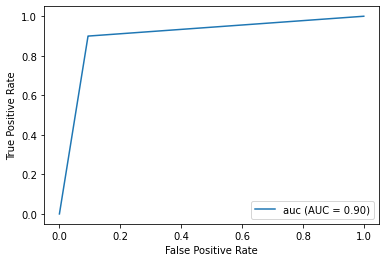

Random Forest


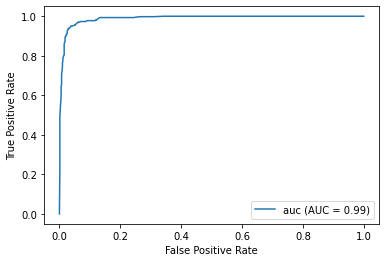

AdaBoost


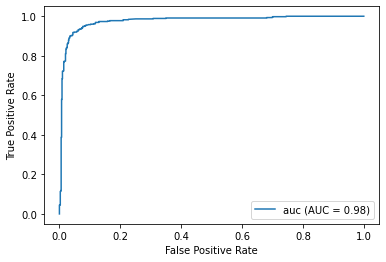

In [33]:
#3c roc curves 
def plot_roc(model):
    model.fit(x_train, y_train)
    predictions = model.predict(x_test)

    probs = model.predict_proba(x_test)
    fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
    auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc, estimator_name='auc')
    display.plot()
    plt.show()
    
estimators = {'Decision Tree': DecisionTreeClassifier(),
             'Random Forest': RandomForestClassifier(n_estimators = 100),
             'AdaBoost' : AdaBoostClassifier(n_estimators = 100)}
for name, model in estimators.items():
    print (name)
    plot_roc(model)

In [ ]:
#4a 